In [40]:
import numpy as np
from matplotlib import pyplot as plt
from functools import partial

plt.rcParams["figure.figsize"] = (20,10)

def grad_batch(f_batch_size, batch_size):
    def grad_help(*args):
        h = 1e-10
        dim = len(args)
        f = f_batch_size(batch_size)
        return [(
                        f(*[args[j] + (h if j == i else 0) for j in range(dim)])
                        -
                        f(*[args[j] - (h if j == i else 0) for j in range(dim)])
                ) / (2 * h)
                for i in range(dim)]
    return grad_help

def sgd_general(batch_size, f, lr0, d, epoch, x):
    points = np.zeros((epoch, len(x)))
    points[0] = x
    for i in range(1, epoch):
        x = x - lr0*np.exp(-d*i) * np.array(grad_batch(f, batch_size)(*x))
        points[i] = x
    return points

sgd = partial(sgd_general, 1)
gd = lambda f, lr0, d, epoch, x: sgd_general( f, lr0, d, epoch, x)



In [41]:
#Realization
def draw_lines_for_methods(x, y, *methods):
    x_mat = np.hstack((np.ones((x.shape[0], 1)), x))
    k = x_mat.shape[1]
    batch_choice = lambda batch_size: list(set(np.random.choice(np.arange(x.shape[0]), batch_size, replace=False)))
    f_batch_size = lambda batch_size: \
                       lambda *b, batch=batch_choice(batch_size): \
                           np.linalg.norm((y[batch] - x_mat[batch].dot(b)))
    f = f_batch_size(x.shape[0])
    for method in methods:
        bs = method(f_batch_size, 0.1, 0.01, 1000, np.full(k, 1))
        draw_levels(f, bs)

def draw_levels(f, *points_arr):
    points_concat = np.concatenate(points_arr)
    tx = np.linspace(0, 40, 100)
    ty = np.linspace(0, 25, 100)
    plt.contour(tx, ty, [[f(x, y) for x in tx] for y in ty],
                levels=sorted([f(*p) for p in points_concat]))
    for points in points_arr:
        plt.plot(points[:, 0], points[:, 1], 'o-')
    #IF in different graphics:
    plt.show()

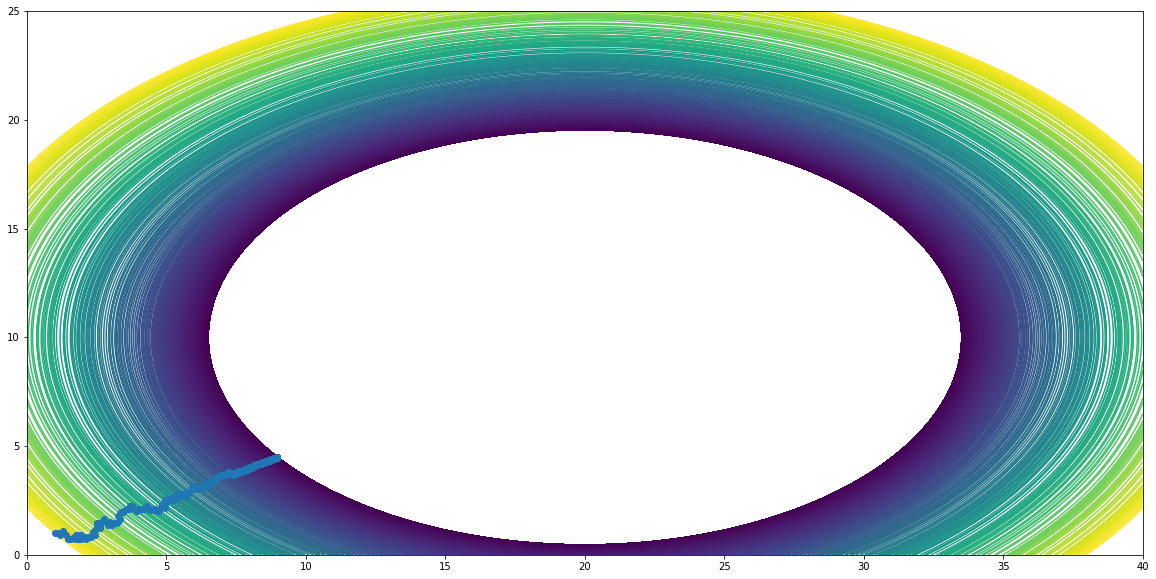

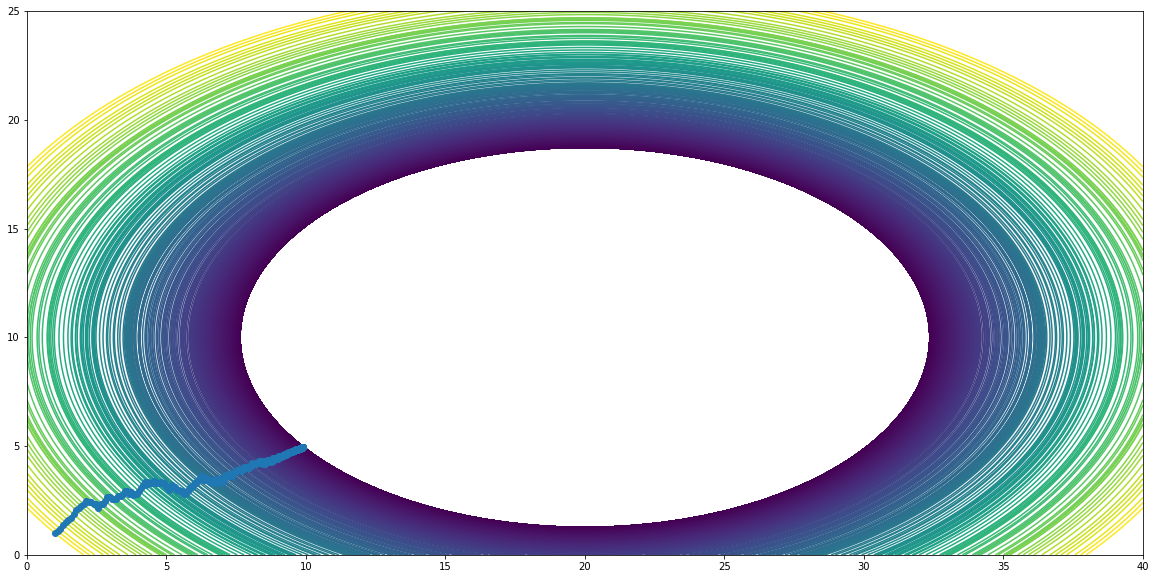

In [42]:
draw_lines_for_methods(np.array([[-2], [-1], [ 0], [ 1], [2]]), np.array([0, 10, 20,30, 40]), sgd, sgd)
#sgd & sgd - like examples of different methods